In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
dataset=pd.read_csv('gdrive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv')

In [37]:
dataset.shape

(1258, 6)

In [38]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [39]:
training_set = dataset.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

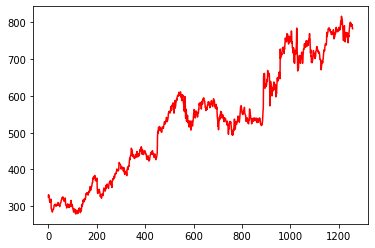

In [40]:
plt.plot(training_set,color = 'red',label = ' 5 Years Google Stock Price')

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [42]:
X_train = []
y_train = []
for i in range (60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [43]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [0]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [0]:
#initializing the RNN
regressor = Sequential()

In [0]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
#Adding the Second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding output layer
regressor.add(Dense(units=1))

In [0]:
#compiling the RNN
regressor.compile(optimizer= 'adam',loss ='mean_squared_error')

In [52]:
y_train.shape

(1198,)

In [53]:
#Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

ValueError: ignored